##### Imports

In [1]:
import collections
import gc
import json
from matplotlib import pyplot as plt
import numpy as np
import random
import tools
reload(tools)
# gc.collect()

<module 'tools' from 'tools.pyc'>

##### Load data

In [3]:
# Load filters
userIdsToFilter = set()
# tools.readUserIdFilters("../bigData/analysis/oneSubredditUsers", userIdsToFilter)
subredditIdToName = tools.read_subreddit_names("../bigData/subredditIdToName")

In [3]:
# Loads months 1 to 5
infilenamePrefix = "../bigData/userSubreddit/RC_2018-0"
userIdToOldSubreddits = collections.defaultdict(set)
# userIdToOldSubreddits = collections.defaultdict(lambda: collections.defaultdict(int))
for i in range(1, 6):
    infilename = infilenamePrefix + str(i)
    # tools.getUserIdToSubreddits(infilename, userIdToOldSubreddits, subredditIdToName, userIdsToFilter, True)
    tools.getUserIdToSubreddits(infilename, userIdToOldSubreddits, subredditIdToName, userIdsToFilter, False)


Processing ../bigData/userSubreddit/RC_2018-01
Processed 1000000
Processed 2000000
Processed 3000000
Processed 4000000
Processed 5000000
Processed 6000000
Processed 7000000
Processed 8000000
Processed 9000000
Processed 10000000
Processed 11000000
Processed 12000000
Processed 13000000
Processed 14000000
Processed 15000000
Processed 16000000
Processed 17000000
Processing ../bigData/userSubreddit/RC_2018-02
Processed 1000000
Processed 2000000
Processed 3000000
Processed 4000000
Processed 5000000
Processed 6000000
Processed 7000000
Processed 8000000
Processed 9000000
Processed 10000000
Processed 11000000
Processed 12000000
Processed 13000000
Processed 14000000
Processed 15000000
Processed 16000000
Processed 17000000
Processing ../bigData/userSubreddit/RC_2018-03
Processed 1000000
Processed 2000000
Processed 3000000
Processed 4000000
Processed 5000000
Processed 6000000
Processed 7000000
Processed 8000000
Processed 9000000
Processed 10000000
Processed 11000000
Processed 12000000
Processed 13

In [4]:
# Loads month 6
infilename = "../bigData/userSubreddit/RC_2018-06"
# userIdToNewSubreddits = collections.defaultdict(set)
userIdToNewSubreddits = collections.defaultdict(lambda: collections.defaultdict(int))
tools.getUserIdToSubreddits(infilename, userIdToNewSubreddits, subredditIdToName, userIdsToFilter, True)
print "Number of users: {}".format(len(userIdToNewSubreddits))
pass

Processing ../bigData/userSubreddit/RC_2018-06
Processed 1000000
Processed 2000000
Processed 3000000
Processed 4000000
Processed 5000000
Processed 6000000
Processed 7000000
Processed 8000000
Processed 9000000
Processed 10000000
Processed 11000000
Processed 12000000
Processed 13000000
Processed 14000000
Processed 15000000
Processed 16000000
Processed 17000000
Processed 18000000
Processed 19000000
Number of users: 4709158


In [2]:
# Load inputGraph
userIdToOldSubreddits = collections.defaultdict(set)
tools.getUserIdToSubreddits("../bigData/analysis/inputGraph", userIdToOldSubreddits)
pass

Processing ../bigData/analysis/inputGraph
Processed 1000000
Processed 2000000
Processed 3000000
Processed 4000000
Processed 5000000
Processed 6000000
Processed 7000000
Processed 8000000
Processed 9000000
Processed 10000000
Processed 11000000
Processed 12000000
Processed 13000000
Processed 14000000
Processed 15000000
Processed 16000000
Processed 17000000
Processed 18000000
Processed 19000000
Processed 20000000
Processed 21000000
Processed 22000000
Processed 23000000
Processed 24000000
Processed 25000000
Processed 26000000
Processed 27000000
Processed 28000000
Processed 29000000
Processed 30000000
Processed 31000000
Processed 32000000
Processed 33000000
Processed 34000000
Processed 35000000
Processed 36000000
Processed 37000000
Processed 38000000
Processed 39000000
Processed 40000000
Processed 41000000
Processed 42000000
Processed 43000000
Processed 44000000
Processed 45000000
Processed 46000000
Processed 47000000
Processed 48000000
Processed 49000000
Processed 50000000
Processed 5100000

In [6]:
userCounter = 0
for userId in userIdToNewSubreddits:
    if userId in userIdToOldSubreddits:
        userCounter += 1
print "{} shared users between old and new".format(userCounter)

3258157 shared users between old and new


##### Old New Analysis

In [4]:
# Simple stats
print "Number of users: {}".format(len(userIdToOldSubreddits))
allSubreddits = set()
for _, subreddits in userIdToOldSubreddits.iteritems():
    allSubreddits.update(subreddits)
print "Number of subreddits: {}".format(len(allSubreddits))
allSubreddits = set()

Number of users: 5374426
Number of subreddits: 143888


In [8]:
# Stats on old vs. new
oldSubredditNums = []
newSubredditNums = []
for userId, oldSubreddits in userIdToOldSubreddits.iteritems():
    oldSubredditNums.append(len(oldSubreddits))
    if userId in userIdToNewSubreddits:
        newSubreddits = userIdToNewSubreddits[userId]
        newSubredditNum = 0
        for subredditId in newSubreddits:
            if subredditId not in oldSubreddits:
                newSubredditNum += 1
        newSubredditNums.append(newSubredditNum)
    else:
        newSubredditNums.append(0)

print "Average number of old subreddits: {}".format(sum(oldSubredditNums)/float(len(oldSubredditNums)))
print "Average number of new subreddits: {}".format(sum(newSubredditNums)/float(len(newSubredditNums)))


100%|██████████| 5374426/5374426 [00:16<00:00, 319484.93it/s]

Average number of old subreddits: 10.3028115002
Average number of new subreddits: 1.36328642352


In [12]:
# Graph on old vs. new
plt.figure()
plt.title("new vs. old subreddits")
plt.xlabel("old subreddits (Jan to May)")
plt.ylabel("new subreddits (June)")
plt.loglog(oldSubredditNums, newSubredditNums, 'b+')
plt.grid(True)
plt.savefig("oldNewSubreddits.png")

##### Distro Analysis

In [4]:
# Original graph subreddit distro preprocess
subredditNums = []
for _, subreddits in userIdToOldSubreddits.iteritems():
    subredditNums.append(len(subreddits))
subredditNums.sort()

xs = []
ys = []
index = -1
for subredditNum in subredditNums:
    if index == -1 or subredditNum != xs[index]:
        xs.append(subredditNum)
        ys.append(1)
        index += 1
    else:
        ys[index] += 1

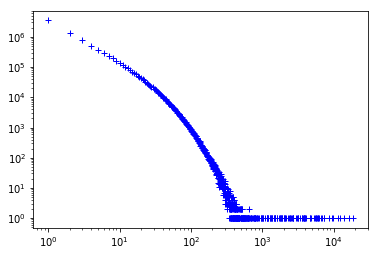

In [5]:
# Original graph subreddit distro
plt.figure()
plt.loglog(xs, ys, "b+")
plt.show()

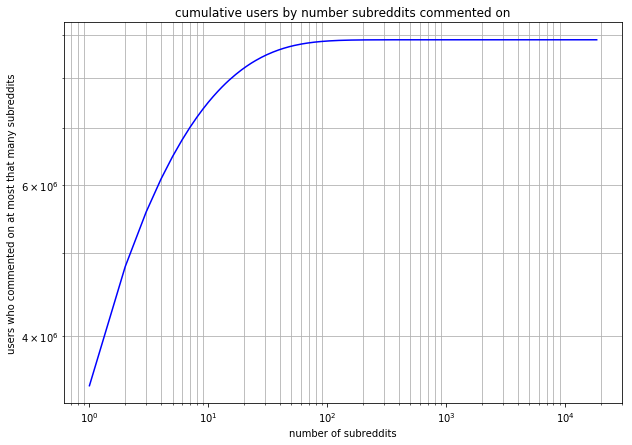

In [6]:
# Original graph cdf
cumulativeYs = np.cumsum(ys)
plt.figure(figsize=(10, 7))
plt.title("cumulative users by number subreddits commented on")
plt.xlabel("number of subreddits")
plt.ylabel("users who commented on at most that many subreddits")
plt.loglog(xs, cumulativeYs, "b-")
plt.grid(True, 'minor')
plt.savefig("originGraphCUsers.png")
plt.show()

##### Transform and save graph

In [5]:
# Save list of 1-subreddit users to filter out
with open('../bigData/analysis/oneSubredditUsers', 'w') as outfile:
    for userId, subreddits in userIdToOldSubreddits.iteritems():
        if len(subreddits) == 1:
            outfile.write("{}\n".format(userId))


In [3]:
# Builds inputGraph, graph that will be used to evaluate subreddit recommendations
with open('../bigData/analysis/inputGraph', 'w') as outfile:
    for userId, subreddits in userIdToOldSubreddits.iteritems():
        for subreddit, count in subreddits.iteritems():
            outfile.write("{} {} {}\n".format(userId, subreddit, count))

In [6]:
# Builds actualNewSubreddits, answer key for recommendations, in JSON format
# {userId: <string>, newSubreddits: {<stringSubreddit>: <intCount>, ...}}
with open('../bigData/analysis/actualNewSubreddits', 'w') as outfile:
    for userId, newSubreddits in userIdToNewSubreddits.iteritems():
        if userId not in userIdToOldSubreddits:
            continue
            
        userJson = {"userId": userId, "newSubreddits": []}
        for subredditId, count in newSubreddits.iteritems():
            if subredditId not in userIdToOldSubreddits[userId]:
                userJson["newSubreddits"].append({subredditId: count})
        outfile.write(json.dumps(userJson) + "\n")

##### Analysis of actualNewSubreddits

In [3]:
# Load
actualNewSubreddits = tools.loadNewSubreddits("../bigData/analysis/actualNewSubreddits")

Processed 1000000
Processed 2000000
Processed 3000000


In [4]:
# Preprocess
subredditNums = []
for _, subreddits in actualNewSubreddits.iteritems():
    subredditNums.append(len(subreddits))
subredditNums.sort()
print "Active users in June: {}".format(len(actualNewSubreddits))
print "Avg new subreddits (among active users in June): {}".format(sum(subredditNums)/float(len(subredditNums)))

xs = []
ys = []
index = -1
for subredditNum in subredditNums:
    if index == -1 or subredditNum != xs[index]:
        xs.append(subredditNum)
        ys.append(1)
        index += 1
    else:
        ys[index] += 1

Active users in June: 3258157
Avg new subreddits (among active users in June): 2.24878113608


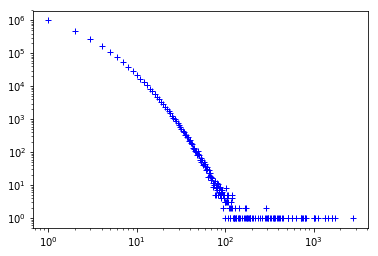

In [6]:
# New subreddits distro
plt.figure()
plt.loglog(xs, ys, "b+")
plt.show()

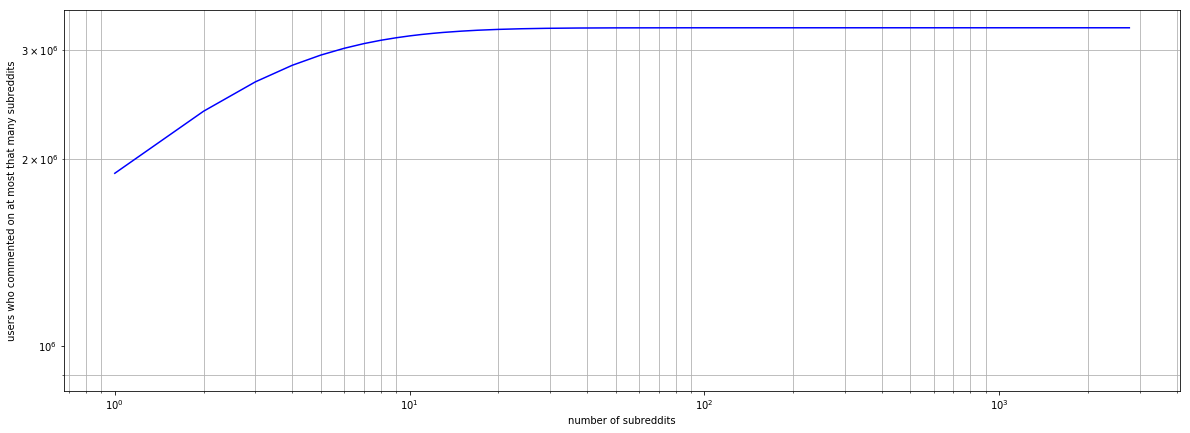

In [7]:
# New subreddits CDF
cumulativeYs = np.cumsum(ys)
plt.figure(figsize=(20, 7))
plt.xlabel("number of subreddits")
plt.ylabel("users who commented on at most that many subreddits")
plt.loglog(xs, cumulativeYs, "b-")
plt.grid(True, 'minor')
plt.show()

In [10]:
# New subreddits on a line
print xs[0]
print cumulativeYs[100] - cumulativeYs[9]
print len(actualNewSubreddits) - cumulativeYs[10]
print len(actualNewSubreddits) - cumulativeYs[100]

for userId, subreddits in actualNewSubreddits.iteritems():
    if len(subreddits) > 1000:
        print userId
        break

0
118620
96766
136
CommonMisspellingBot


In [16]:
# Output some random subset for dev and test.
newSubredditsList = [(userId, subreddits) for userId, subreddits in actualNewSubreddits.iteritems()]
random.shuffle(newSubredditsList)

with open('../bigData/analysis/actualNewSubredditsDev', 'w') as devfile, \
     open('../bigData/analysis/actualNewSubredditsTest', 'w') as testfile:
    counter = 0
    for userId, subreddits in newSubredditsList:
        if len(subreddits) < 10 or len(subreddits) > 100:
            continue
        
        userJson = {"userId": userId, "newSubreddits": subreddits}
        if counter < 100:
            devfile.write(json.dumps(userJson) + "\n")
        elif counter < 200:
            testfile.write(json.dumps(userJson) + "\n")
        else:
            break
        
        counter += 1

##### Output to prep for collab filtering

In [4]:
# Output indexToUserId, intended to be indexed 0 to len(indexToUserIds) - 1
with open("../bigData/analysis/indexToUserId", 'w') as outfile:
    for userId, _ in userIdToOldSubreddits.iteritems():
        outfile.write(userId + "\n")

In [7]:
# Output subredditVectors, each subreddit represented by list of userIds that commented
# Format is json: {<subredditId>: [<userIdIndex>, ...]}
indexToUserId, userIdToIndex = tools.loadIndexToUserId("../bigData/analysis/indexToUserId")
subredditVectors = collections.defaultdict(list)
for userId, subreddits in userIdToOldSubreddits.iteritems():
    for subreddit in subreddits:
        subredditVectors[subreddit].append(userIdToIndex[userId])
print "Done Generating"        

with open("../bigData/analysis/subredditVectors", 'w') as outfile:
    for subreddit, subredditVector in subredditVectors.iteritems():
        subredditJson = {}
        subredditVector.sort()
        subredditJson[subreddit] = subredditVector
        outfile.write(json.dumps(subredditJson) + "\n")
print "Done Outputting"

Done Generating
Done Outputting


In [3]:
# Modify dev to include the user old subreddits as well
actualNewSubredditsDev = tools.loadNewSubreddits("../bigData/analysis/actualNewSubredditsDev")

with open('../bigData/analysis/oldSubredditsDev', 'w') as outfile:
    for userId in actualNewSubredditsDev:
        oldSubredditList = [subreddit for subreddit in userIdToOldSubreddits[userId]]
        userJson = {"userId": userId, "oldSubreddits": oldSubredditList}
        outfile.write(json.dumps(userJson) + "\n")

##### Analysis of how many users per subreddit

In [3]:
# Load the subredditVectors
subredditVectors = tools.loadSubredditVectors("../bigData/analysis/subredditVectors")

In [4]:
# Preprocess
userNums = []
for _, users in subredditVectors.iteritems():
    userNums.append(len(users))
userNums.sort()
print "Number of subreddits Jan to May: {}".format(len(userNums))
print "Avg users per subreddit: {}".format(sum(userNums)/float(len(userNums)))

xs = []
ys = []
index = -1
for userNum in userNums:
    if index == -1 or userNum != xs[index]:
        xs.append(userNum)
        ys.append(1)
        index += 1
    else:
        ys[index] += 1

Number of subreddits Jan to May: 143888
Avg users per subreddit: 384.82498888


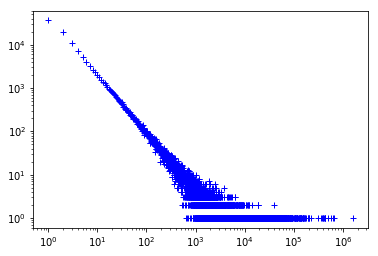

In [5]:
# Users per old subreddit distro
plt.figure()
plt.loglog(xs, ys, "b+")
plt.show()

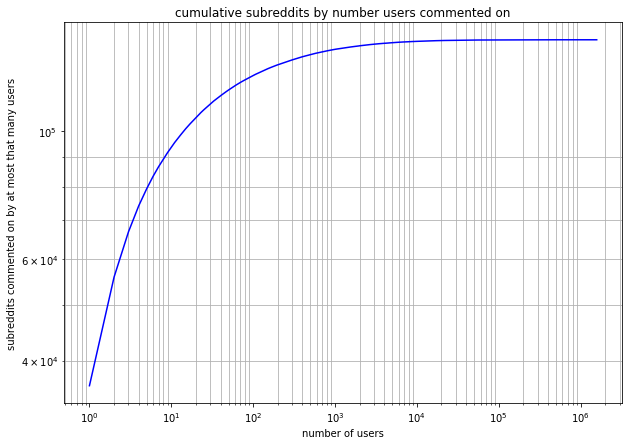

In [7]:
# Users per old subreddit CDF
cumulativeYs = np.cumsum(ys)
plt.figure(figsize=(10, 7))
plt.title("cumulative subreddits by number users commented on")
plt.xlabel("number of users")
plt.ylabel("subreddits commented on by at most that many users")
plt.loglog(xs, cumulativeYs, "b-")
plt.grid(True, 'minor')
plt.savefig("graphCSubreddits.png")
plt.show()

In [8]:
# Load actual new subreddits
actualNewSubreddits = tools.loadNewSubreddits("../bigData/analysis/actualNewSubreddits")

Processed 1000000
Processed 2000000
Processed 3000000


In [9]:
# Flip to subredditId -> numUsers
newSubredditNumUsers = collections.defaultdict(int)
for userId, newSubreddits in actualNewSubreddits.iteritems():
    for newSubredditDict in newSubreddits:
        newSubreddit = newSubredditDict.keys()[0]
        newSubredditNumUsers[newSubreddit] += 1
print "Total subreddits: {}".format(len(newSubredditNumUsers))

Total subreddits: 68020


In [10]:
# Plot users 6th month against users in the last 5
# ie, with all subreddits with 1 user in last 5, how many total interactions in 6th month?
userNums = []
for subredditId, users in subredditVectors.iteritems():
    userNums.append((len(users), subredditId))
userNums.sort()

xs = []
ys = []
index = -1
for userNum, subredditId in userNums:
    if index == -1 or userNum != xs[index]:
        xs.append(userNum)
        ys.append(newSubredditNumUsers[subredditId])
        index += 1
    else:
        ys[index] += newSubredditNumUsers[subredditId]
print "Total buckets: {}".format(len(xs))
print "Total new user-subreddit interactions: {}".format(sum(ys))

Total buckets: 4672
Total new user-subreddit interactions: 7266383


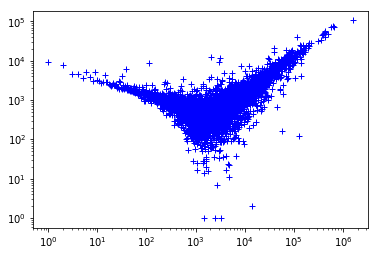

In [11]:
# Users interactions 6th month against users in last 5 Distro
plt.figure()
plt.loglog(xs, ys, "b+")
plt.show()

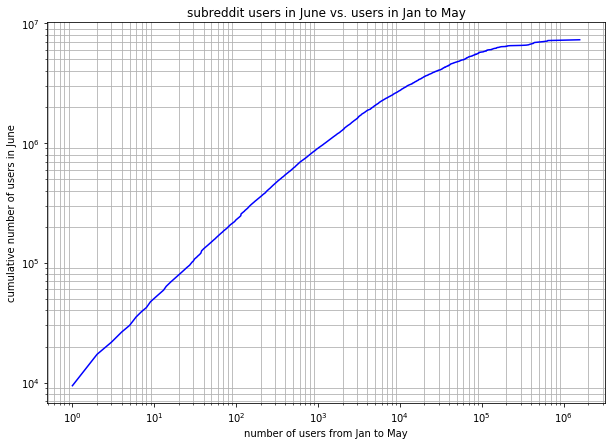

In [12]:
# Users interactions 6th month against users in last 5 Cumulative
cumulativeYs = np.cumsum(ys)
plt.figure(figsize=(10, 7))
plt.title("subreddit users in June vs. users in Jan to May")
plt.xlabel("number of users from Jan to May")
plt.ylabel("cumulative number of users in June")
plt.loglog(xs, cumulativeYs, "b-")
plt.grid(True, 'minor')
plt.savefig("graphCJtJ.png")
plt.show()

##### Process Alexis Dev Set

In [3]:
# Modify dev to include the user old subreddits as well
alexisDevSet = tools.loadNewSubreddits("../bigData/analysis/alexisDevSet")

with open('../bigData/analysis/alexDevOld', 'w') as outfile:
    for userId in alexisDevSet:
        oldSubredditList = [subreddit for subreddit in userIdToOldSubreddits[userId]]
        userJson = {"userId": userId, "oldSubreddits": oldSubredditList}
        outfile.write(json.dumps(userJson) + "\n")